In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
train_labels = pd.read_csv('/content/drive/MyDrive/project9/music30s_trainlabel.csv')
train = pd.read_csv('/content/drive/MyDrive/project9/music30s_trainin.csv')

In [32]:
train = train.iloc[:,1:]
train.shape, train_labels.shape

((900, 58), (900, 2))

In [33]:
  test = pd.read_csv('/content/drive/MyDrive/project9/music30s_test.csv')

In [34]:
display(train.head(7))
display(test.head(7))

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661504,0.432846,0.086019,0.142929,0.004758,3089.637185,1.311379e+06,2973.703815,271609.298651,6574.771380,...,-4.922164,106.523758,-5.005428,74.781494,1.383756,75.593880,-2.103029,82.962410,-2.102471,56.383205
1,661504,0.398761,0.090296,0.092221,0.001716,2170.544505,2.470449e+05,2054.465986,111598.068567,4306.240937,...,5.730653,62.366760,-7.947048,57.781807,5.203198,71.078148,-1.486348,55.774078,0.463148,60.979748
2,661794,0.375874,0.081557,0.099977,0.001147,2321.871533,5.433791e+05,2545.325000,155899.829366,4580.418732,...,-0.442143,51.811581,-3.584000,51.066288,-5.018315,47.032211,-2.522085,35.879490,-4.752133,33.392231
3,661794,0.424385,0.085162,0.175975,0.003569,1886.954809,2.533910e+05,1913.258610,123441.419116,3828.288761,...,0.975607,48.149387,-6.554968,35.716187,-0.689079,46.263088,-2.127222,47.571030,-1.508367,50.199821
4,661794,0.456134,0.075901,0.097609,0.000364,2269.128009,1.357942e+05,1928.953538,88450.196573,4186.459372,...,6.971109,40.836742,-12.668804,40.830875,-0.556885,31.079792,-11.754225,37.405830,-1.540814,30.325340
5,661794,0.339008,0.095508,0.098882,0.002995,1443.810106,4.486678e+05,1670.850632,189283.640576,3070.713038,...,-0.062720,48.167507,-2.558915,46.626541,-3.445502,91.455971,-3.870722,94.486176,1.314720,82.384666
6,661794,0.389313,0.073420,0.101960,0.000372,2628.863788,9.393646e+04,2210.478936,37253.811076,5085.874454,...,4.514653,26.217716,-12.762190,24.685890,2.999796,31.530489,-6.408553,31.573473,2.254876,38.511021


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661504,0.326701,0.091451,0.056816,0.001078,1366.306035,468047.938162,1736.646891,185305.764094,2562.717631,...,2.877666,75.942657,1.237590,135.273865,1.965581,140.919281,0.791661,109.242943,-4.267680,177.675522
1,661794,0.437906,0.094107,0.005276,0.000030,971.777391,94103.177831,1614.749295,207167.296701,1906.571121,...,4.095938,14.534595,4.332311,13.931521,3.357461,15.662603,2.624509,20.659353,1.659115,23.679209
2,661504,0.457251,0.090083,0.285521,0.006891,2808.849567,939226.160293,2441.508002,158175.792905,5528.454222,...,12.258653,66.535225,-7.046246,67.616226,4.735236,58.401016,1.867201,57.100945,0.030806,67.664940
3,661794,0.342450,0.103002,0.045812,0.001188,1846.466568,732352.809385,2731.147995,342129.725183,4330.014059,...,3.157343,17.922062,0.284560,19.612217,-1.377794,20.133987,-1.593034,16.212904,-1.996848,18.466488
4,661794,0.294790,0.092382,0.061659,0.001761,2149.049179,699906.211340,2036.555526,130918.151667,4426.180712,...,-2.190892,69.668869,-13.639559,112.140495,-6.491189,47.259911,-9.144039,75.013718,-12.712146,63.297348
5,661794,0.397855,0.082284,0.113301,0.000587,2634.080774,820747.026509,2898.541576,233608.971679,5807.827964,...,0.558818,42.996780,-2.325614,41.673706,-4.613111,41.339603,-0.618727,29.171967,-4.939899,29.804676
6,661504,0.400411,0.086721,0.221757,0.006173,3267.551920,750868.383991,3014.277539,115696.132586,6921.042939,...,0.302779,53.960278,0.005258,74.174622,2.765022,89.242897,2.292987,85.087379,0.051603,93.724510


In [35]:
train_labels = train_labels.iloc[:,1:]
train_labels.head(7)

,label
0,reggae
1,reggae
2,country
3,blues
4,metal
5,blues
6,rock


In [36]:
unique = train_labels['label'].unique()
print(len(unique))

10


In [37]:
print(train_labels['label'].unique())

['reggae' 'country' 'blues' 'metal' 'rock' 'jazz' 'pop' 'hiphop'
 'classical' 'disco']


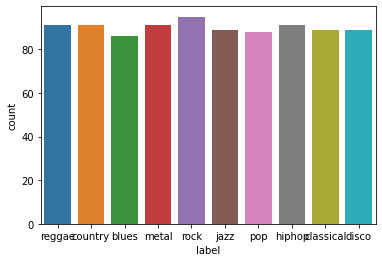

In [38]:
sns.countplot(x=train_labels['label'])

In [39]:
labels_ = pd.get_dummies(train_labels,prefix='')

In [40]:
labels_ = pd.get_dummies(train_labels,prefix='')

for i in labels_.columns:
    print('the percent of {} in the label data set is {}'.format(i,sum(labels_[i])*100/labels_.shape[0]))
    print('the number of {} in the label data set is {}'.format(i,sum(labels_[i])))
    print('-'*100)


the percent of _blues in the label data set is 9.555555555555555
the number of _blues in the label data set is 86
----------------------------------------------------------------------------------------------------
the percent of _classical in the label data set is 9.88888888888889
the number of _classical in the label data set is 89
----------------------------------------------------------------------------------------------------
the percent of _country in the label data set is 10.11111111111111
the number of _country in the label data set is 91
----------------------------------------------------------------------------------------------------
the percent of _disco in the label data set is 9.88888888888889
the number of _disco in the label data set is 89
----------------------------------------------------------------------------------------------------
the percent of _hiphop in the label data set is 10.11111111111111
the number of _hiphop in the label data set is 91
--------------

In [41]:
TARGET = 'label'
FEATURES = [col for col in train.columns if col not in [TARGET]]

In [42]:
len(FEATURES)

58

In [43]:
train_comb = pd.concat([train, train_labels], axis=1)

In [44]:
train_comb

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661504,0.432846,0.086019,0.142929,0.004758,3089.637185,1.311379e+06,2973.703815,271609.298651,6574.771380,...,106.523758,-5.005428,74.781494,1.383756,75.593880,-2.103029,82.962410,-2.102471,56.383205,reggae
1,661504,0.398761,0.090296,0.092221,0.001716,2170.544505,2.470449e+05,2054.465986,111598.068567,4306.240937,...,62.366760,-7.947048,57.781807,5.203198,71.078148,-1.486348,55.774078,0.463148,60.979748,reggae
2,661794,0.375874,0.081557,0.099977,0.001147,2321.871533,5.433791e+05,2545.325000,155899.829366,4580.418732,...,51.811581,-3.584000,51.066288,-5.018315,47.032211,-2.522085,35.879490,-4.752133,33.392231,country
3,661794,0.424385,0.085162,0.175975,0.003569,1886.954809,2.533910e+05,1913.258610,123441.419116,3828.288761,...,48.149387,-6.554968,35.716187,-0.689079,46.263088,-2.127222,47.571030,-1.508367,50.199821,blues
4,661794,0.456134,0.075901,0.097609,0.000364,2269.128009,1.357942e+05,1928.953538,88450.196573,4186.459372,...,40.836742,-12.668804,40.830875,-0.556885,31.079792,-11.754225,37.405830,-1.540814,30.325340,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,661504,0.469879,0.086839,0.144261,0.008266,2868.233682,1.353624e+06,2676.125867,225551.708478,5796.886499,...,69.473038,-5.572653,90.371826,7.771932,123.477547,-1.518996,96.361115,5.007198,67.499344,reggae
896,661794,0.290960,0.091076,0.089215,0.003113,1109.352784,1.386997e+05,1463.217702,37692.267055,2243.341758,...,100.648956,-2.823469,87.407570,-2.675381,77.598251,0.740614,76.061050,-0.530982,67.630028,blues
897,661504,0.454745,0.086461,0.223571,0.013054,3123.151410,9.471130e+05,2970.246872,221789.180783,6616.305648,...,46.262592,-1.865332,50.931961,-0.019046,65.033195,-0.727255,73.956261,-0.986098,66.340393,pop
898,661794,0.437934,0.094721,0.252890,0.013661,1821.519761,7.452975e+05,2522.060569,309565.051070,4003.377184,...,49.640724,-5.466094,51.848621,-1.297010,42.504318,-4.247594,39.925827,-5.021968,58.707275,hiphop


In [45]:
train_comb.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
rolloff_var,900.000000,1832092.345540,1413402.119781,14686.118554,776975.094154,1489777.205876,2513348.965950,8660900.484354
spectral_centroid_var,900.000000,467279.131267,400108.171098,7911.251394,187496.474079,338114.720555,600116.900878,3036843.061563
spectral_bandwidth_var,900.000000,136337.966864,95979.506540,10787.185064,67468.932262,111679.047288,180282.345958,694784.811549
mfcc1_var,900.000000,3725.285630,2809.071748,174.571365,1824.903595,3088.326172,4961.070801,28243.437500
length,900.000000,662058.222222,1857.249152,660000.000000,661504.000000,661794.000000,661794.000000,675808.000000
rolloff_mean,900.000000,4581.474236,1575.246664,749.140636,3398.197169,4681.106858,5537.472187,8677.672688
spectral_centroid_mean,900.000000,2206.387756,716.718035,570.040355,1621.413022,2224.024109,2702.689540,4435.243901
spectral_bandwidth_mean,900.000000,2245.030187,525.930914,898.066208,1924.396266,2221.392843,2578.469836,3509.646417
mfcc2_var,900.000000,701.522024,434.059674,93.104752,397.932762,607.180511,873.471497,4025.973389
mfcc3_var,900.000000,466.527391,286.766316,35.467754,272.311798,405.416626,588.413864,2924.435059


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
y = train_comb['label']
X = train_comb[FEATURES]

In [48]:
!pip install optuna

In [49]:
cat_cols = [c for c in train.columns if train[c].dtype==object]

In [50]:
cat_cols

[]

In [51]:
len(cat_cols)

0

In [52]:
# one can obersve that X_mean columns are normally distributed where as the columns
# X_var are not, and are either left or right skewed, so we pick all the columns containing
# the word _var and then transform them!

var_cols = [col for col in train.columns if '_var' in col]
print(list(train.columns))


['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']


In [53]:
print(var_cols)

['chroma_stft_var', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_var', 'zero_crossing_rate_var', 'harmony_var', 'perceptr_var', 'mfcc1_var', 'mfcc2_var', 'mfcc3_var', 'mfcc4_var', 'mfcc5_var', 'mfcc6_var', 'mfcc7_var', 'mfcc8_var', 'mfcc9_var', 'mfcc10_var', 'mfcc11_var', 'mfcc12_var', 'mfcc13_var', 'mfcc14_var', 'mfcc15_var', 'mfcc16_var', 'mfcc17_var', 'mfcc18_var', 'mfcc19_var', 'mfcc20_var']


In [54]:
len(var_cols)

28

In [55]:
from scipy import stats

In [56]:
original_var_train = train[var_cols]

In [57]:
original_var_test = test[var_cols]

In [58]:
#for i in range(len(var_cols)):
 # display(original_var[var_cols[i]].head())

In [59]:
from sklearn.preprocessing import PowerTransformer


In [60]:
pt = PowerTransformer(method='box-cox')
original_var_train_transformed = pt.fit_transform(original_var_train)
original_var_test_transformed = pt.transform(original_var_test)
pd.DataFrame({'cols':original_var_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,chroma_stft_var,3.162288
1,rms_var,0.143890
2,spectral_centroid_var,0.144757
3,spectral_bandwidth_var,0.088702
4,rolloff_var,0.198639
5,zero_crossing_rate_var,0.092789
6,harmony_var,0.260695
7,perceptr_var,0.287117
8,mfcc1_var,0.230446
9,mfcc2_var,0.065785


In [61]:
var_train_transformed = pd.DataFrame(original_var_train_transformed, columns = original_var_train.columns)

In [62]:
  var_test_transformed = pd.DataFrame(original_var_test_transformed, columns= original_var_test.columns)

In [63]:
display(var_train_transformed.head(3))
display(var_test_transformed.head(3))

,chroma_stft_var,rms_var,spectral_centroid_var,spectral_bandwidth_var,rolloff_var,zero_crossing_rate_var,harmony_var,perceptr_var,mfcc1_var,mfcc2_var,...,mfcc11_var,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,mfcc20_var
0,-0.123650,0.892129,1.702806,1.358987,1.644748,1.464454,-0.012941,0.882548,1.052997,1.024141,...,1.838597,0.833696,1.034494,0.776698,0.990850,1.481935,0.680471,0.666631,0.743034,-0.091657
1,0.491594,-0.077791,-0.399484,0.006762,-0.375331,0.083251,-0.606148,-0.166932,-0.204898,0.021270,...,0.824710,-0.080086,0.785104,0.768889,1.027054,0.374397,0.127377,0.540703,-0.063098,0.060347
2,-0.698904,-0.423070,0.530146,0.502534,0.803409,0.242894,-0.537517,-0.078573,-0.762395,0.306963,...,0.631436,0.303991,-0.387986,0.346198,0.130285,-0.055250,-0.151197,-0.366009,-1.045659,-1.167858


,chroma_stft_var,rms_var,spectral_centroid_var,spectral_bandwidth_var,rolloff_var,zero_crossing_rate_var,harmony_var,perceptr_var,mfcc1_var,mfcc2_var,...,mfcc11_var,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,mfcc20_var
0,0.668960,-0.475092,0.345904,0.764603,0.775221,0.320765,-0.919577,-1.183952,1.367246,1.502916,...,1.438900,1.531189,1.933873,1.593768,1.864126,0.803889,1.817925,1.818024,1.261632,1.923743
1,1.095814,-2.789422,-1.402396,0.935885,-0.390356,-2.591164,-2.834482,-2.282050,1.383816,1.636184,...,-1.153414,-1.881063,-3.674341,-3.609437,-3.750683,-3.791344,-3.700374,-3.402824,-2.418003,-1.934408
2,0.459406,1.280954,1.240860,0.524361,0.467114,1.021164,2.446276,1.468478,0.244173,0.729581,...,1.184065,0.593270,1.220743,0.620820,0.712082,0.518463,0.468916,0.123271,-0.013371,0.258653


In [64]:
  cont_features_var = [col for col in original_var_train.columns if original_var_train[col].nunique() >= 15]
  features_var = [c for c in original_var_train.columns]

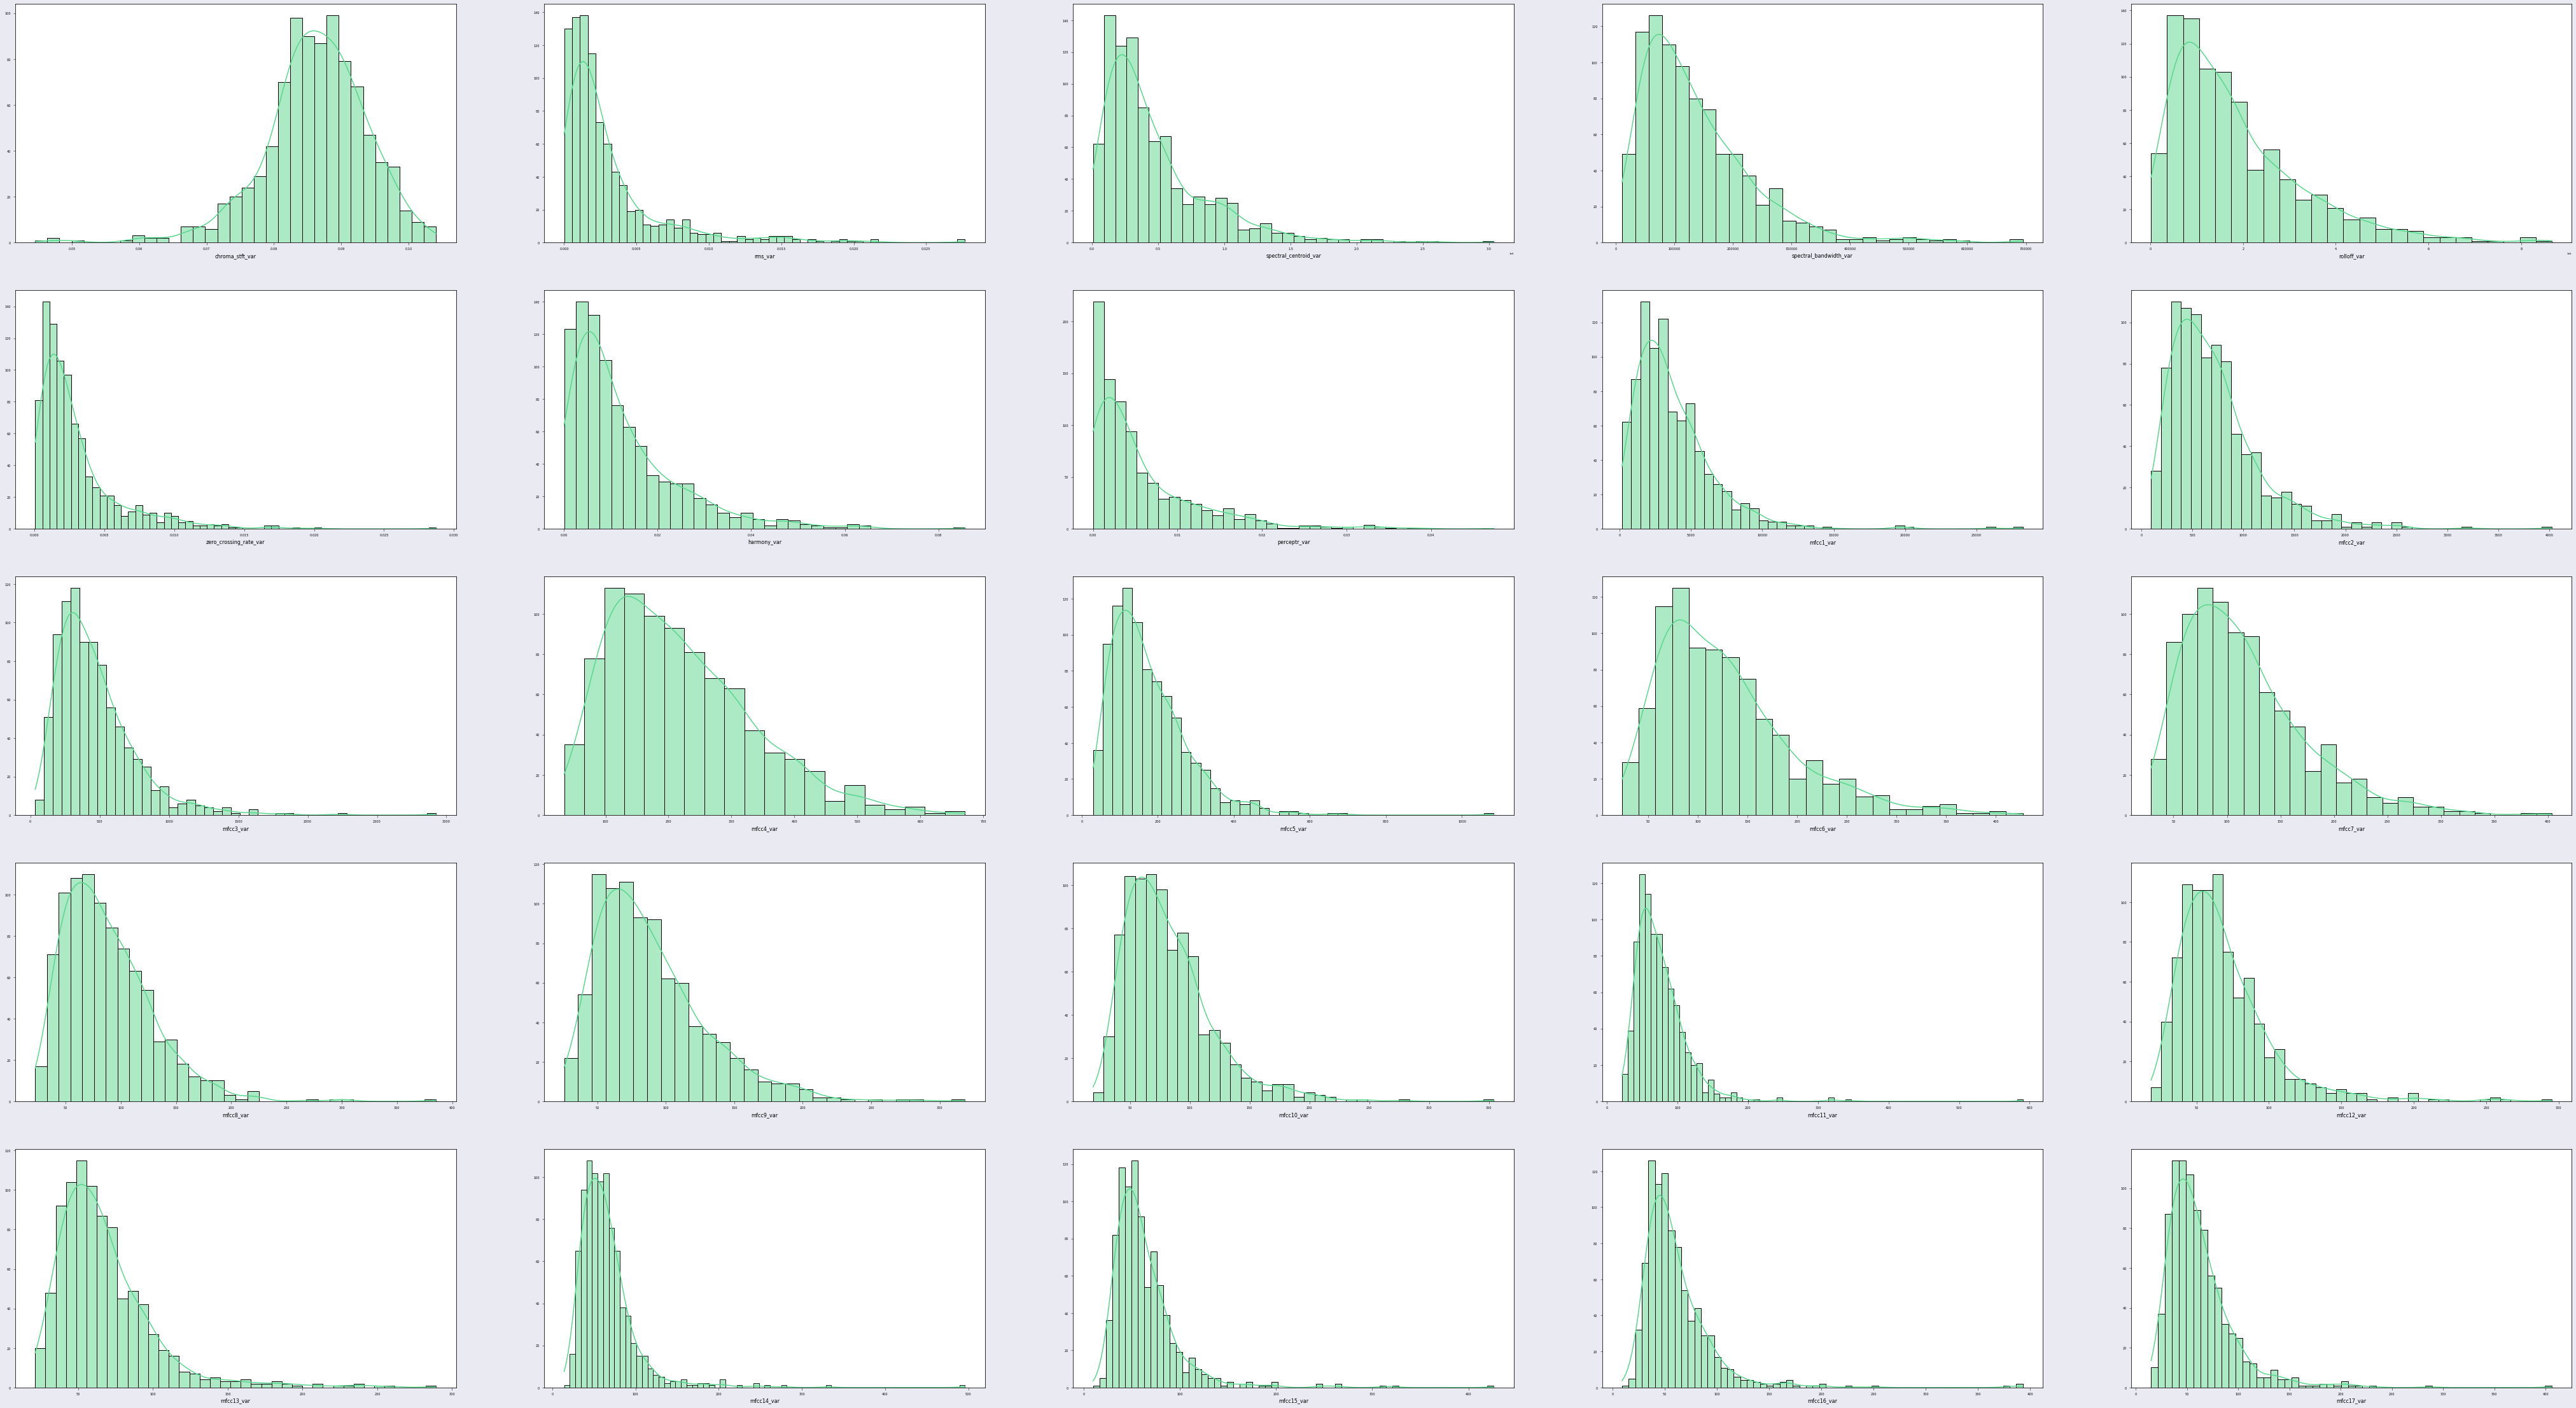

In [65]:
ncols = 5
nrows = int(len(cont_features_var) / ncols + (len(features_var) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(72, 40), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features_var[r*ncols+c]
        sns.histplot(x=original_var_train[col], ax=axes[r, c], color='#58D68D' , fill =True , kde = True)
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

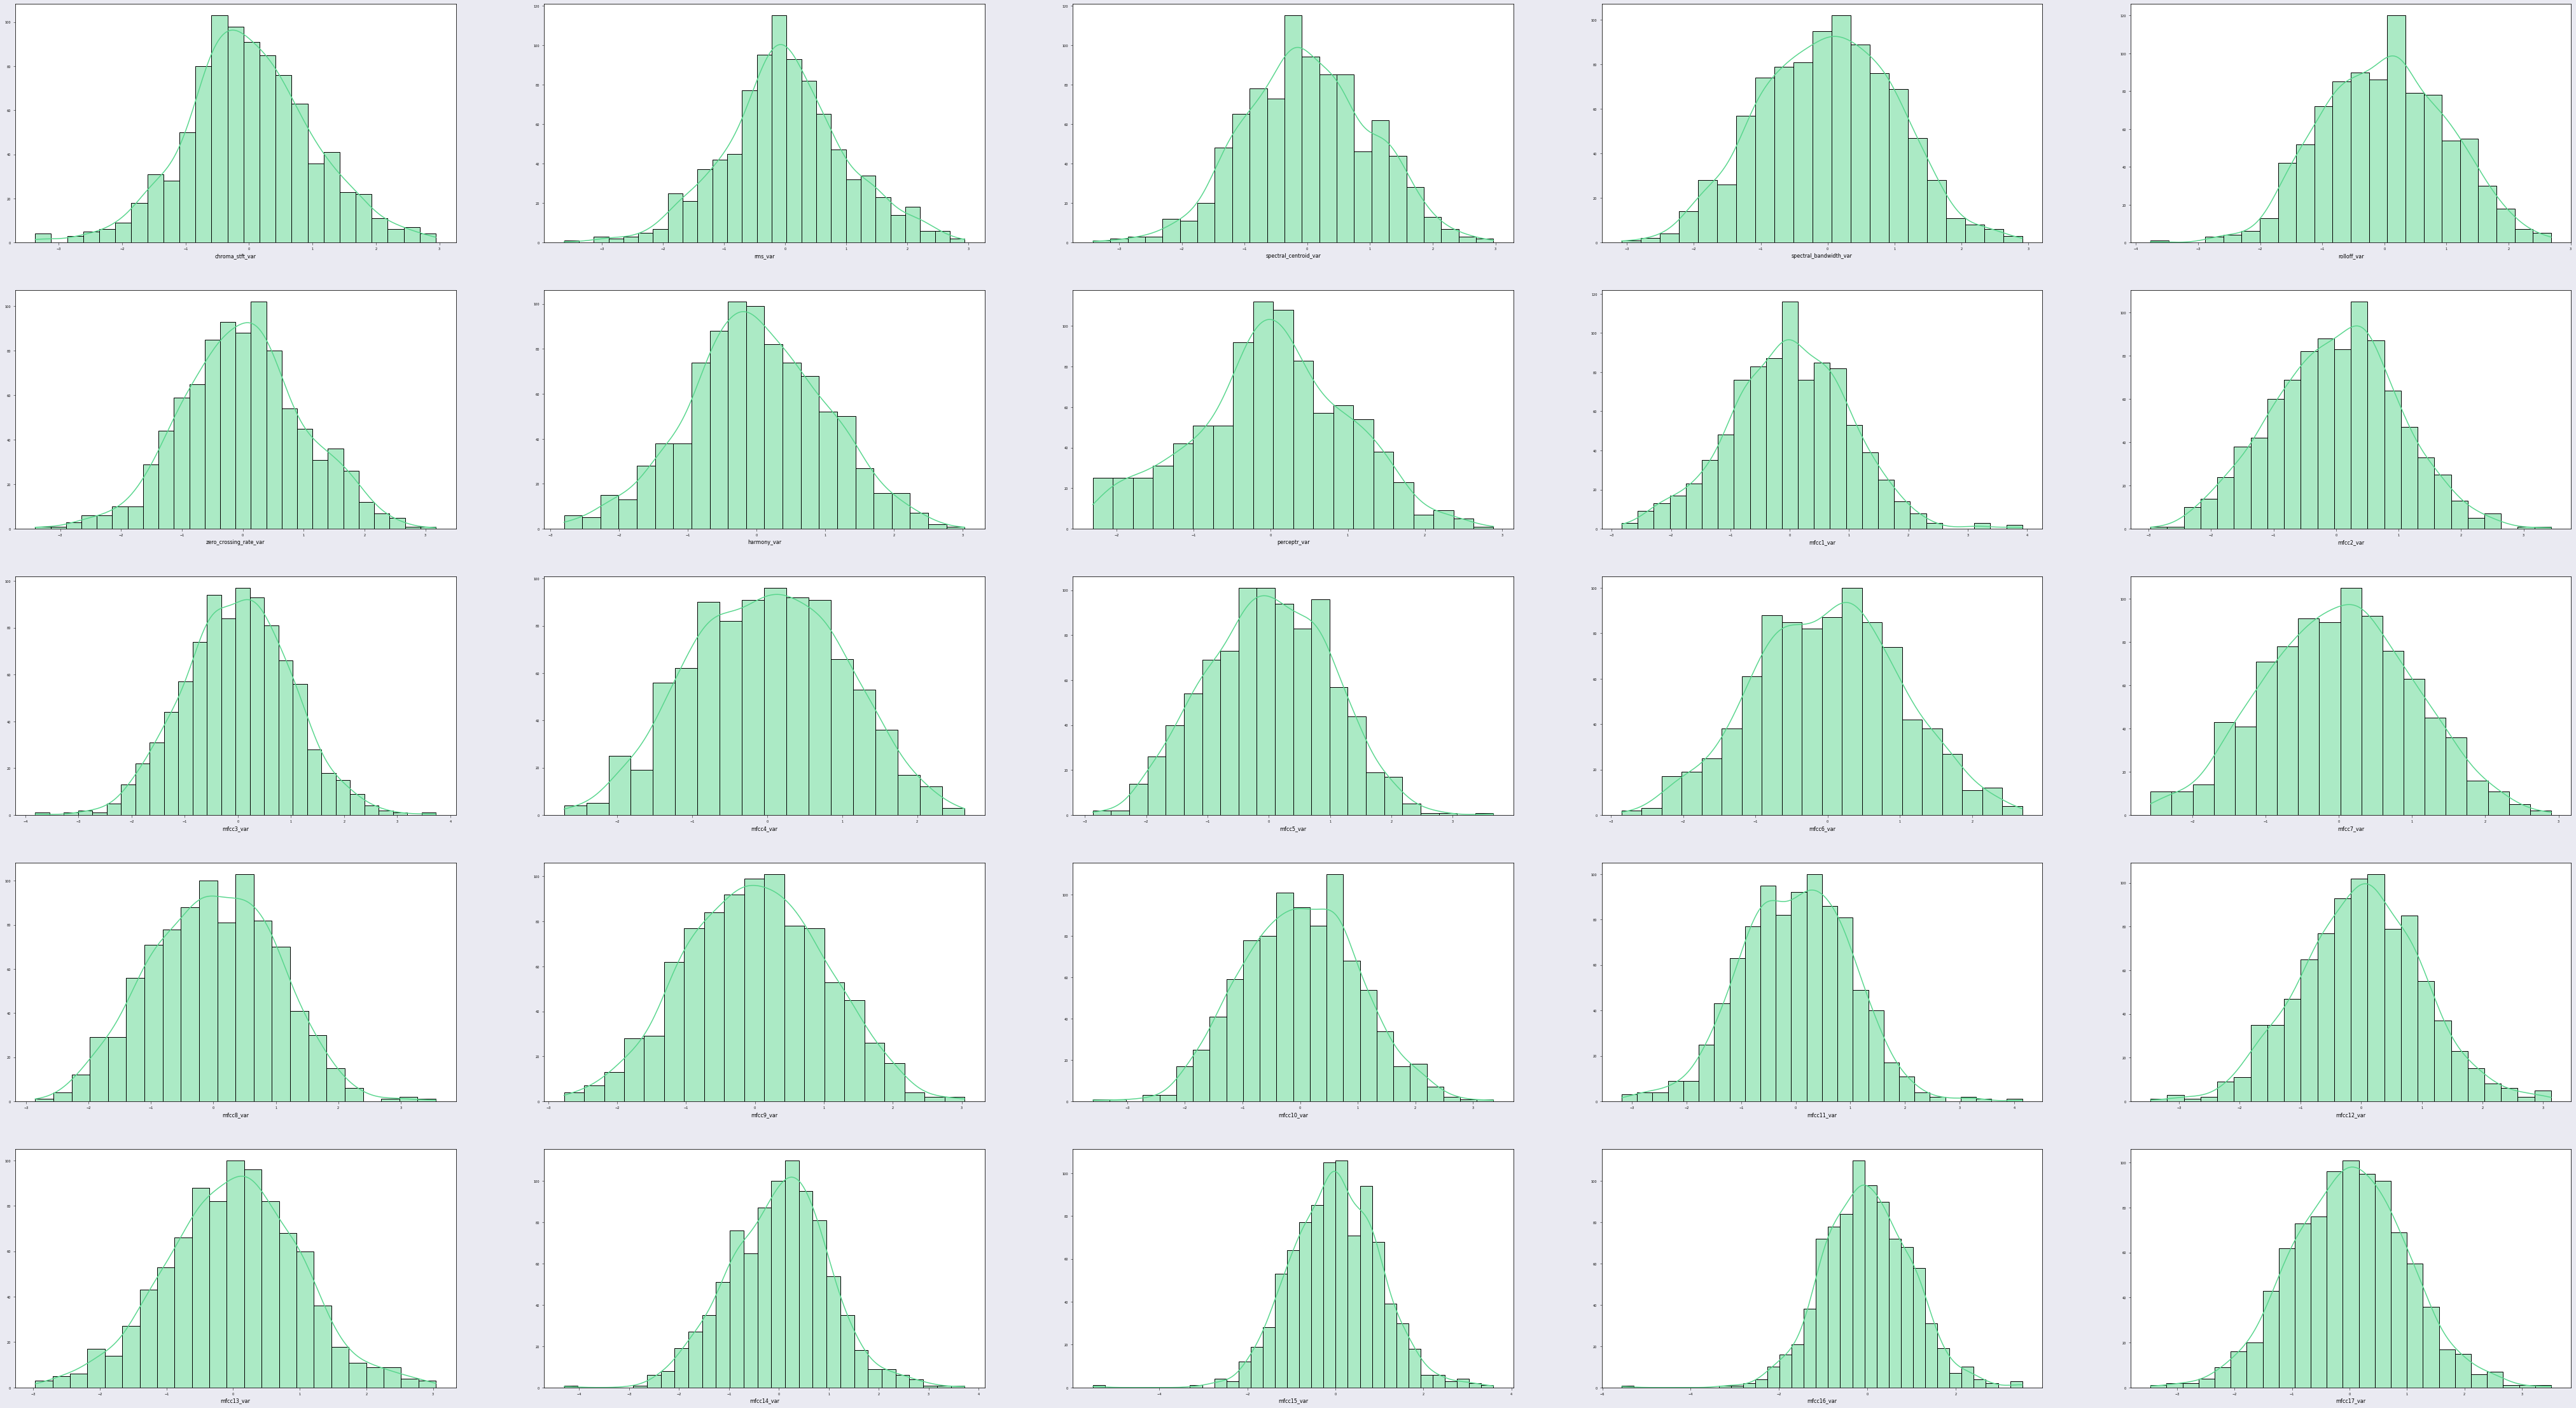

In [66]:
ncols = 5
nrows = int(len(cont_features_var) / ncols + (len(features_var) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(72, 40), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features_var[r*ncols+c]
        sns.histplot(x=var_train_transformed[col], ax=axes[r, c], color='#58D68D' , fill =True , kde = True)
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

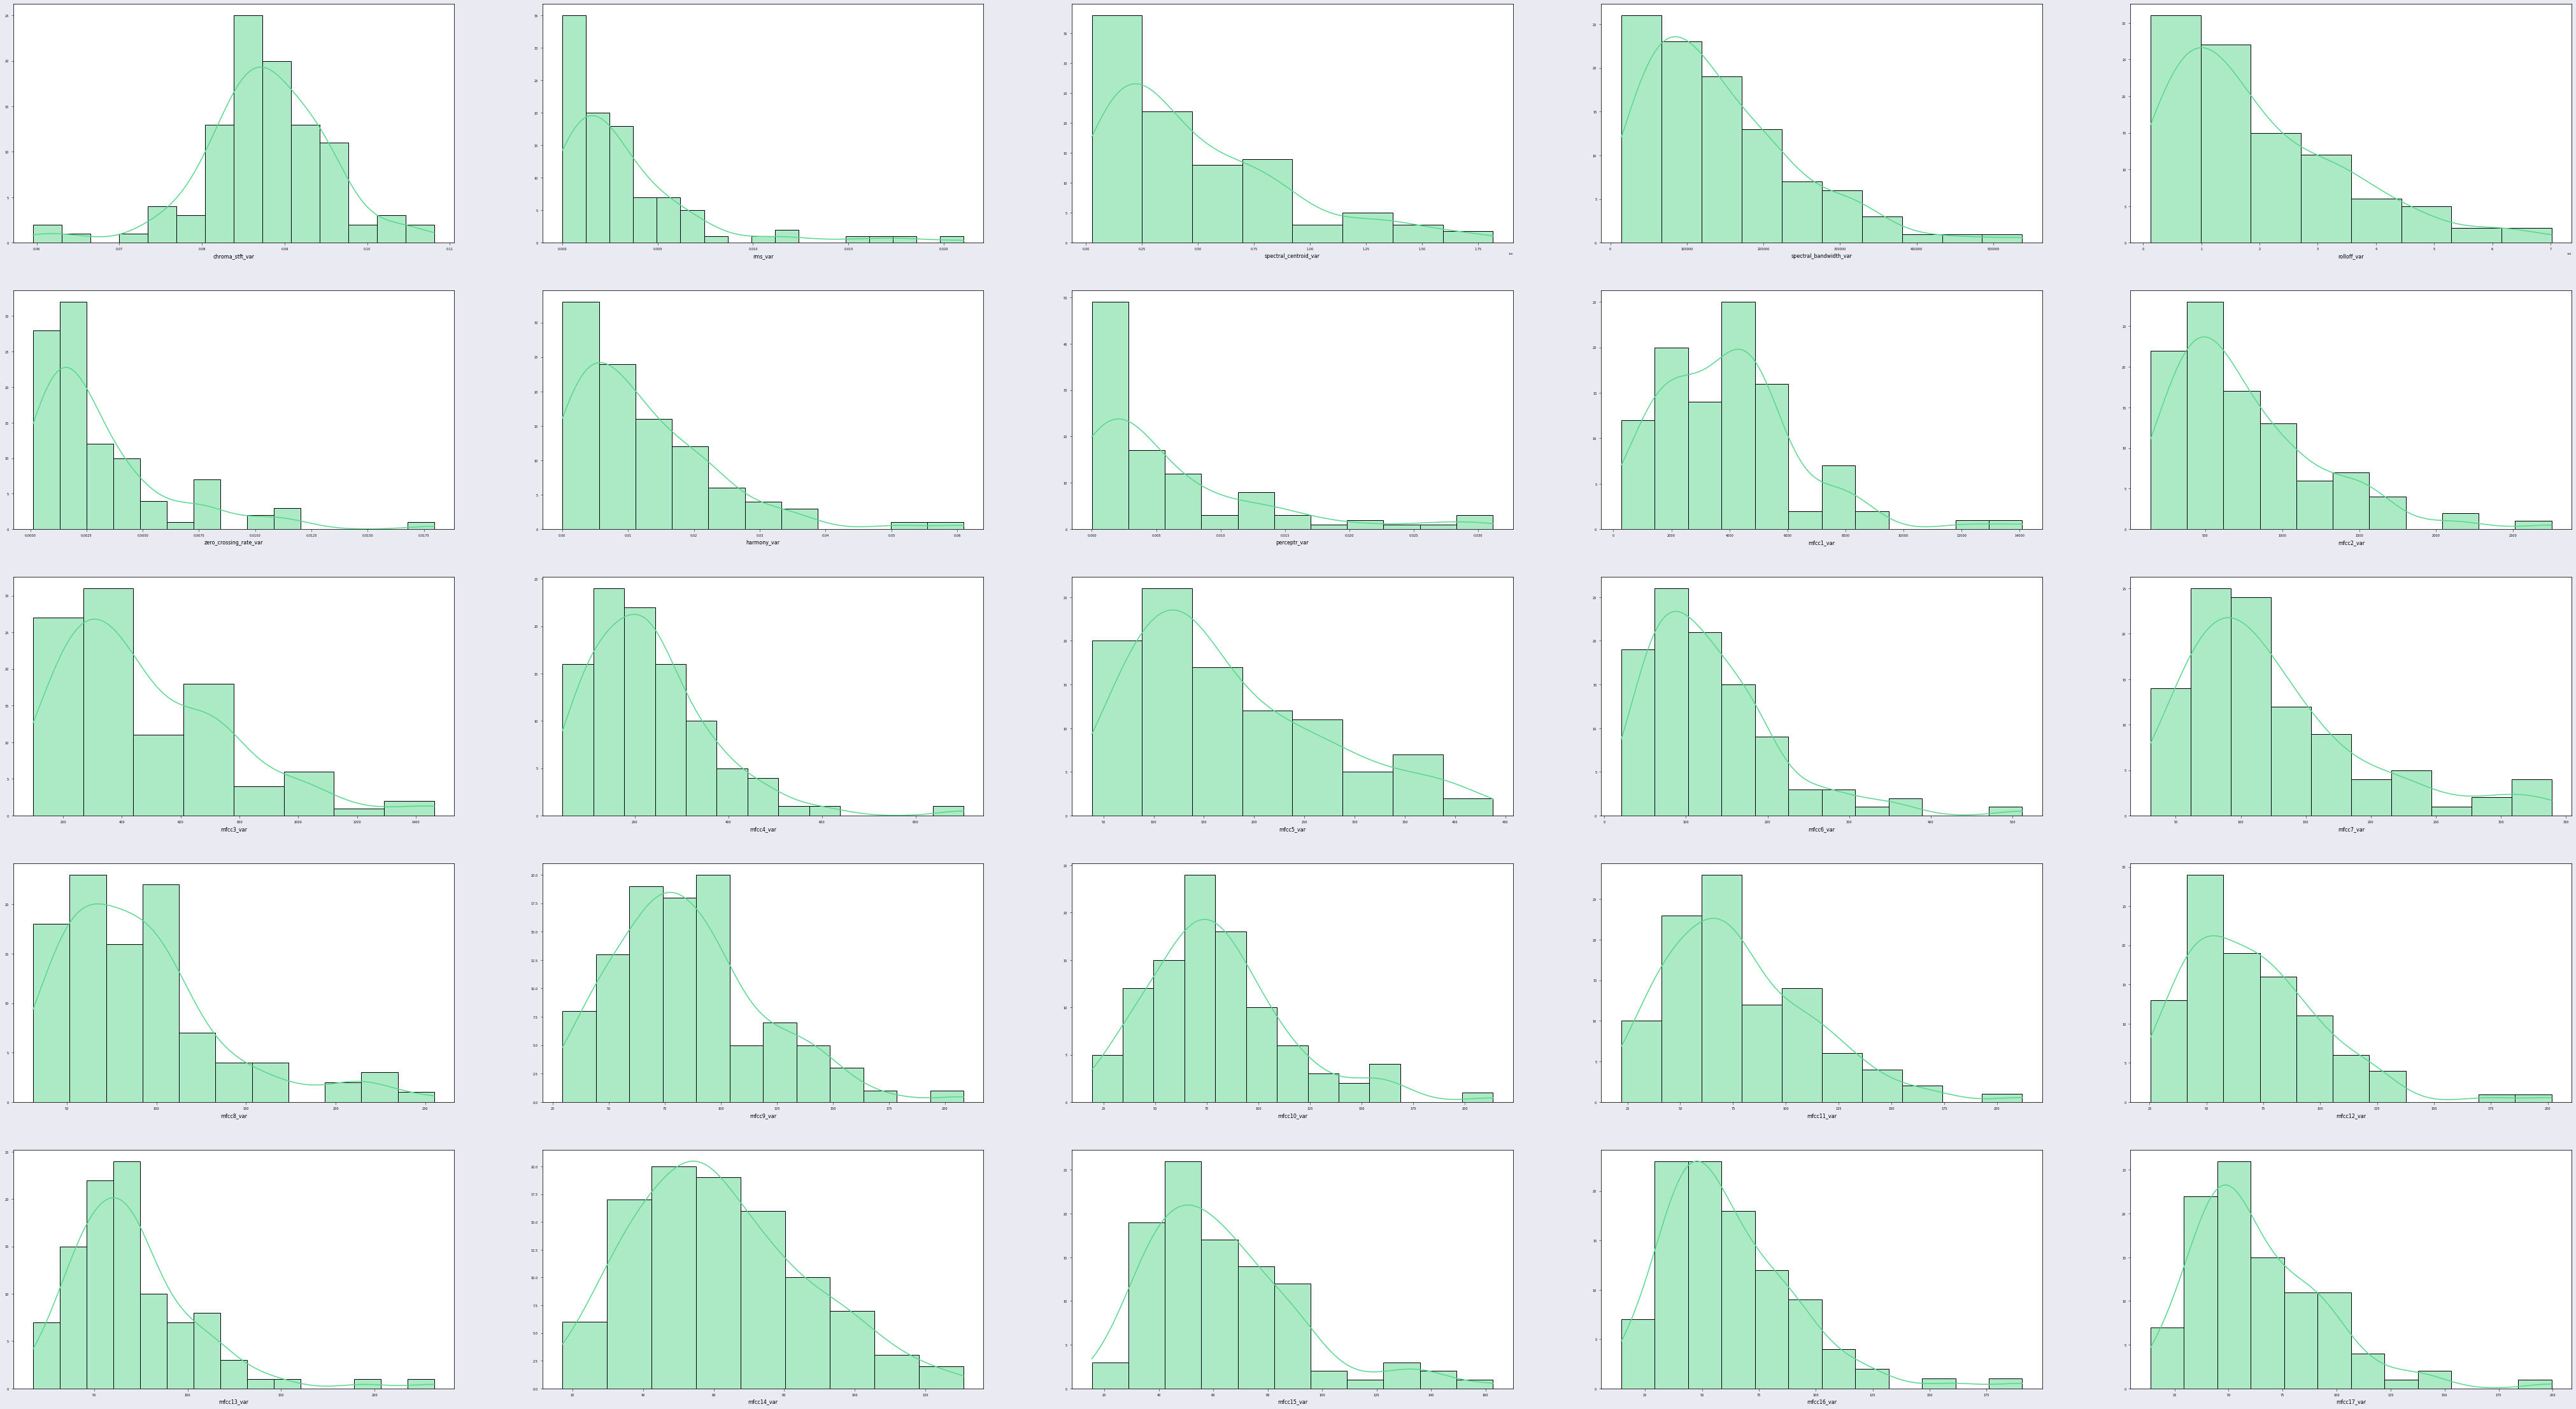

In [67]:
ncols = 5
nrows = int(len(cont_features_var) / ncols + (len(features_var) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(72, 40), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features_var[r*ncols+c]
        sns.histplot(x=original_var_test[col], ax=axes[r, c], color='#58D68D' , fill =True , kde = True)
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

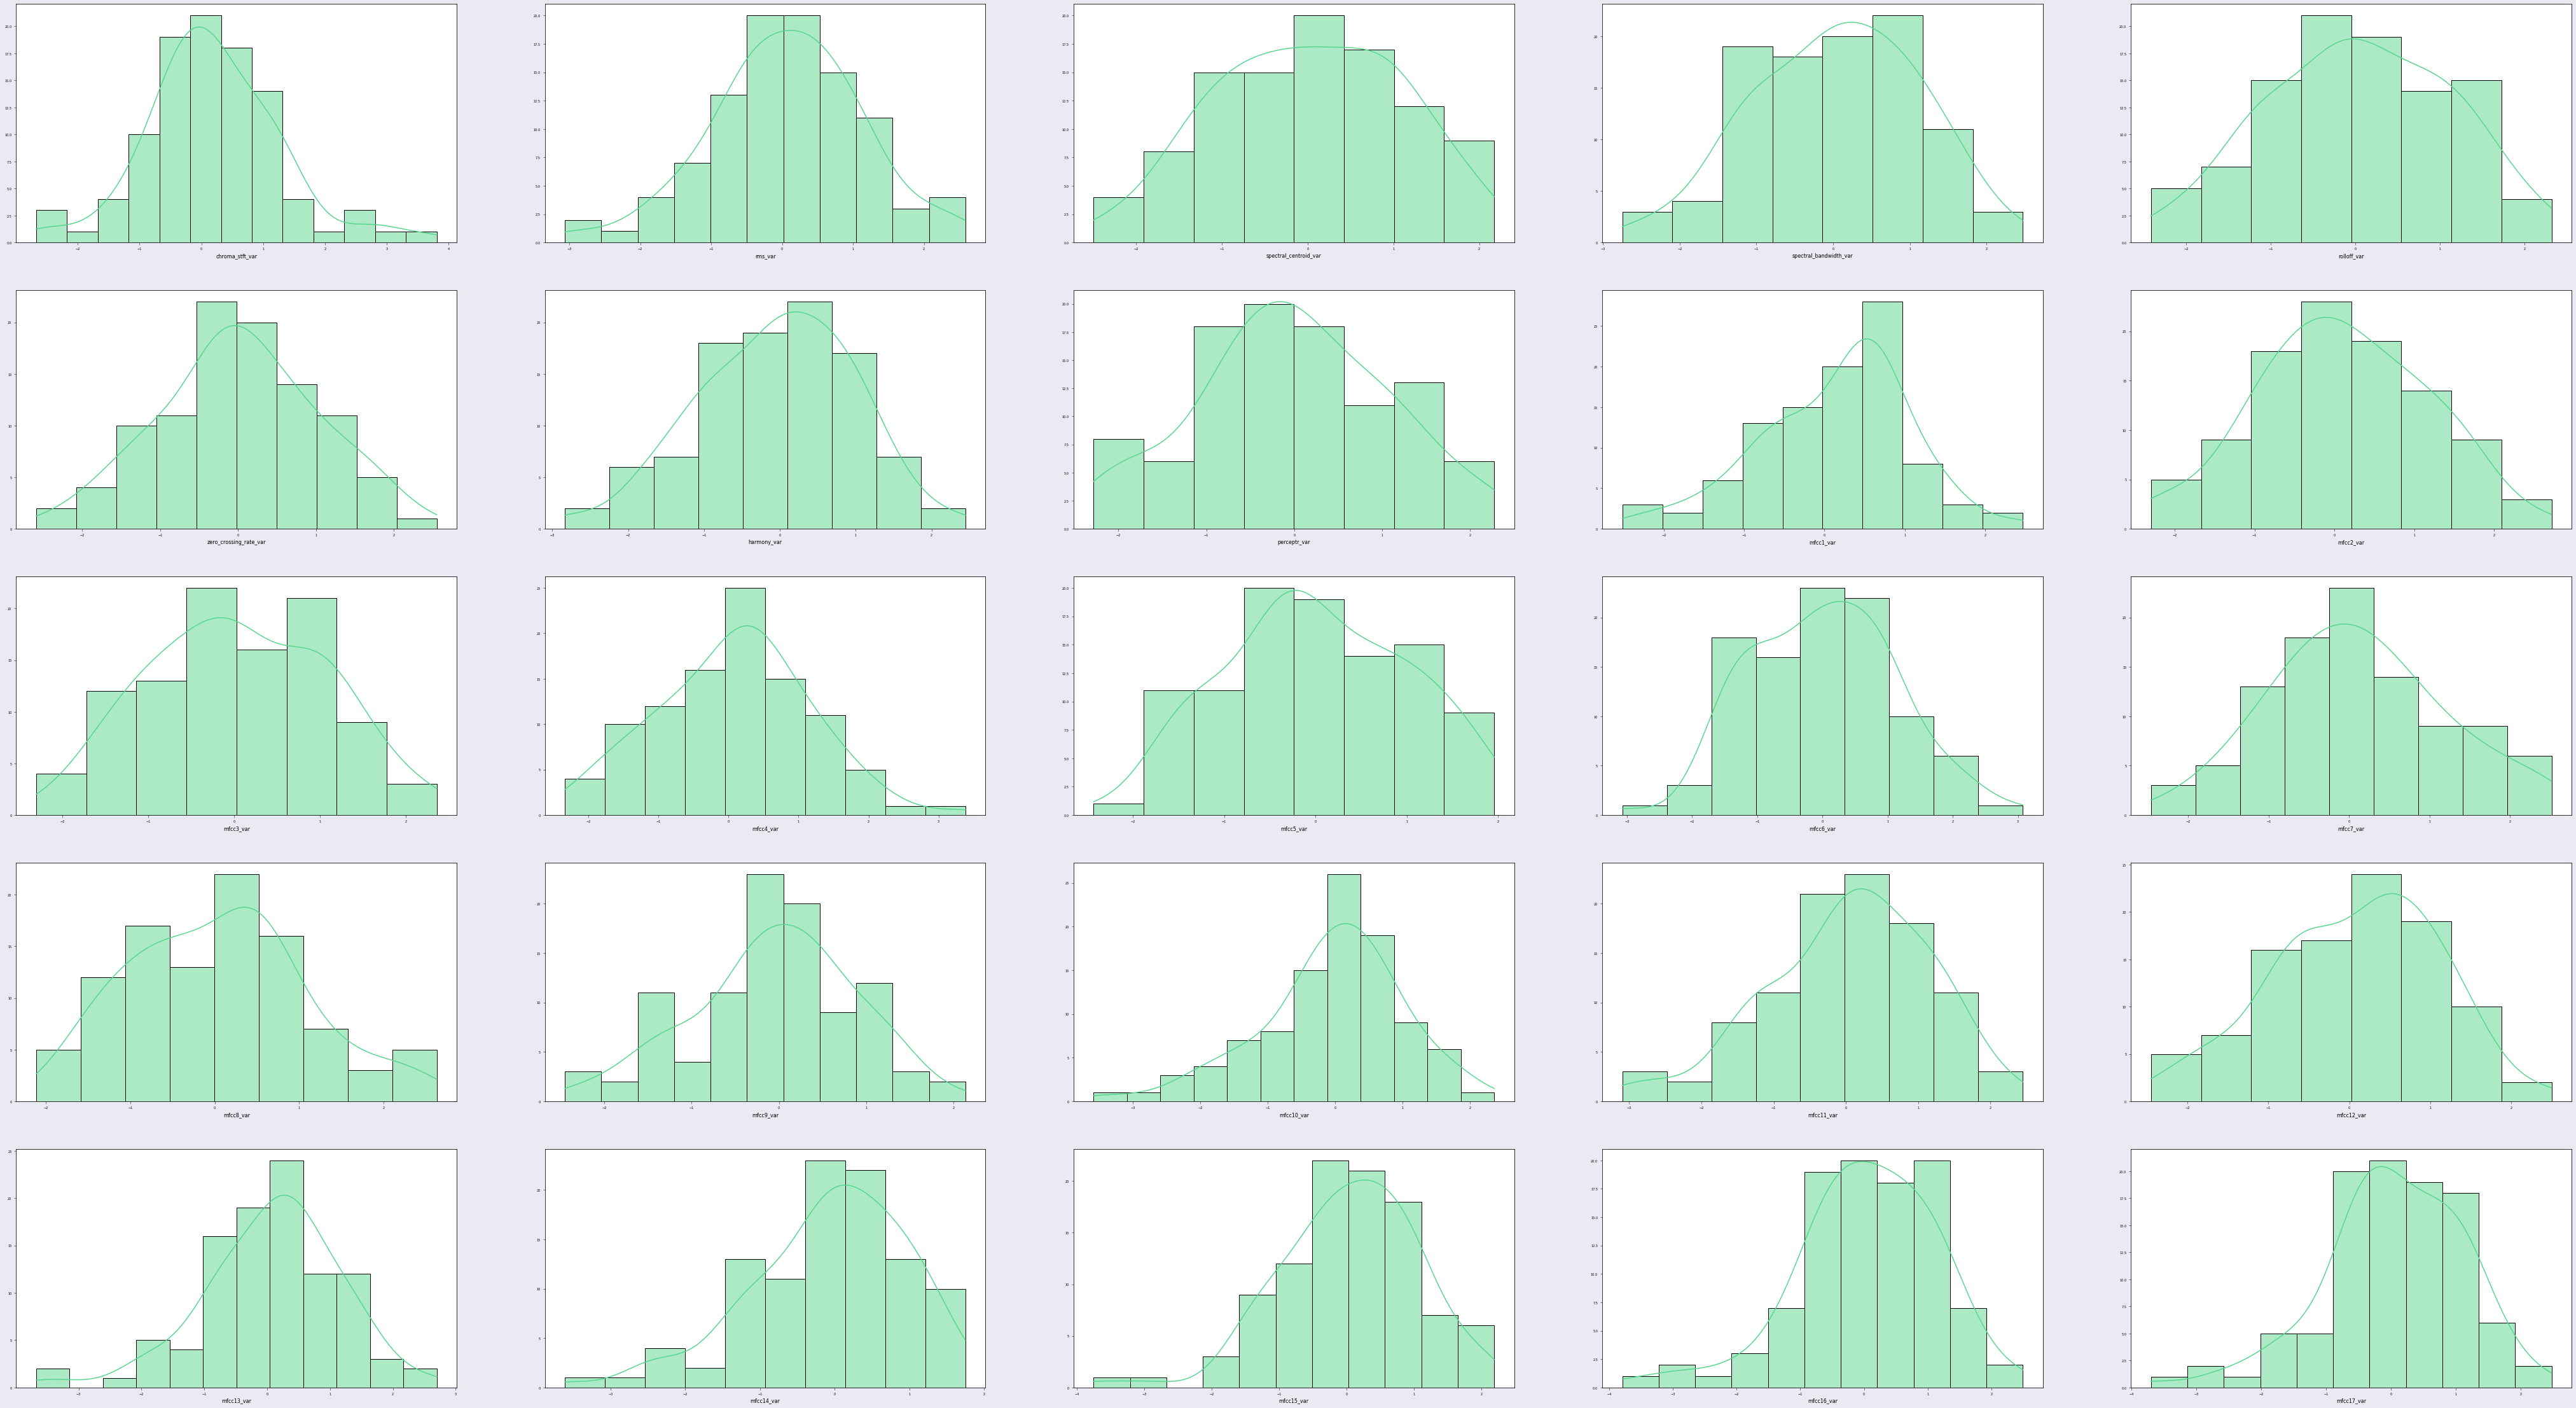

In [68]:
ncols = 5
nrows = int(len(cont_features_var) / ncols + (len(features_var) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(72, 40), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features_var[r*ncols+c]
        sns.histplot(x=var_test_transformed[col], ax=axes[r, c], color='#58D68D' , fill =True , kde = True)
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

In [69]:
train = train.drop(var_cols, axis=1)

In [70]:
test=test.drop(var_cols, axis=1)

In [71]:
train.shape, test.shape

((900, 30), (100, 30))

In [72]:
train = pd.concat([train, var_train_transformed],axis=1)
test = pd.concat([test, var_test_transformed], axis=1)

In [73]:
train.shape, test.shape

((900, 58), (100, 58))

In [74]:
train.to_csv('train_transformed.csv', index=False)
test.to_csv('test_transformed.csv', index=False)

In [75]:
!cp -r '/content/test_transformed.csv' /content/drive/MyDrive/project9



In [76]:
!cp -r '/content/train_transformed.csv' /content/drive/MyDrive/project9

